In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install geopandas rioxarray earthpy

  Using cached geopandas-0.14.3-py3-none-any.whl.metadata (1.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 70.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 60.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 69.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━

In [3]:
import geopandas as gpd
import rioxarray as rxr
import earthpy as et

sns.set(font_scale=1.5, style="white")

In [4]:
et.data.get_data("colorado-flood")

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

Extracted output to /home/codespace/earth-analytics/data/colorado-flood/.


In [6]:
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4028235e+38
    scale_factor:   1.0
    add_offset:     0.0

In [7]:
dtm_pre_arr.rio.crs

CRS.from_epsg(32613)

In [8]:
dtm_pre_arr.rio.nodata

-3.4028235e+38

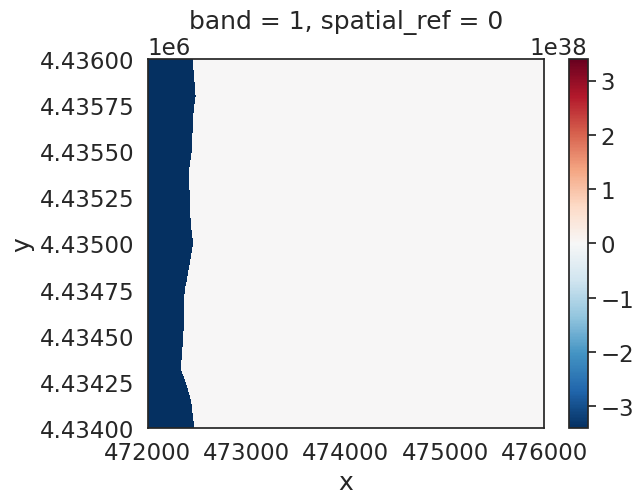

In [9]:
dtm_pre_arr.plot()
plt.show()

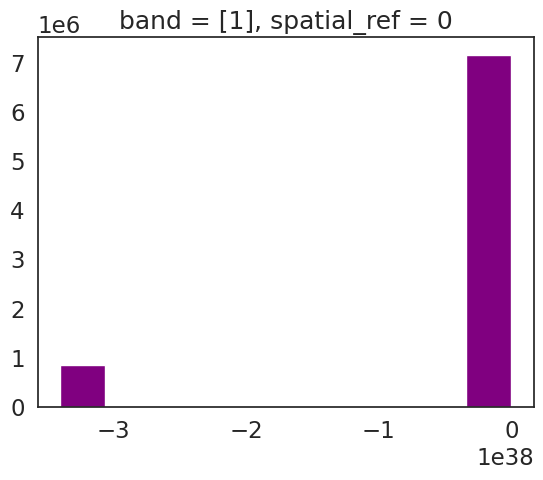

In [10]:
dtm_pre_arr.plot.hist(color="purple")
plt.show()

In [12]:
np.nanmin(dtm_pre_arr.values)

-3.4028235e+38

In [13]:
np.nanmax(dtm_pre_arr.values)

2087.43

In [14]:
dtm_pre_arr.shape

(1, 2000, 4000)

In [16]:
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()

dtm_pre_arr.shape
                              

(2000, 4000)

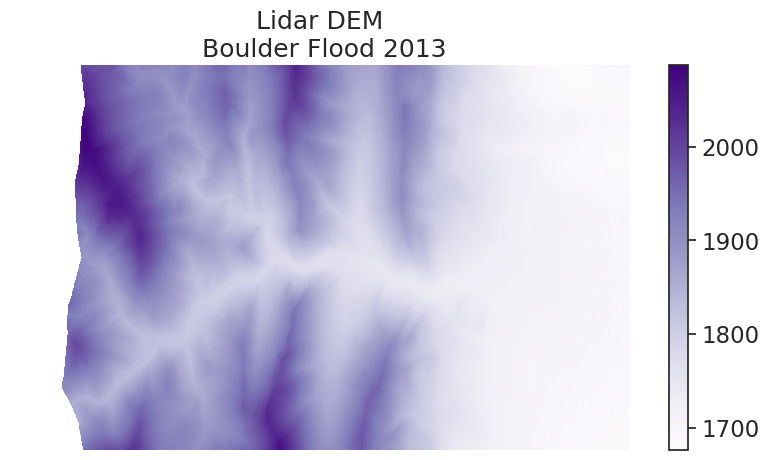

In [21]:
f, ax = plt.subplots(figsize=(10,5))

dtm_pre_arr.plot(cmap="Purples", ax=ax)

ax.set(title="Lidar DEM\n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

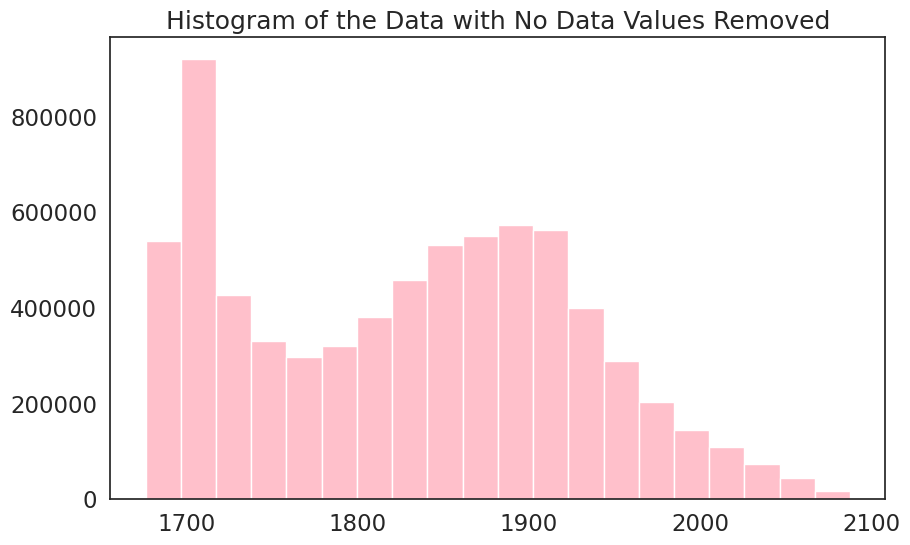

In [22]:
f, ax =plt.subplots(figsize=(10,6))

dtm_pre_arr.plot.hist(color="pink", bins=20)
ax.set_title("Histogram of the Data with No Data Values Removed")
plt.show()

In [24]:
np.nanmin(dtm_pre_arr.data)

1676.21

In [25]:
np.nanmax(dtm_pre_arr.data)

2087.43

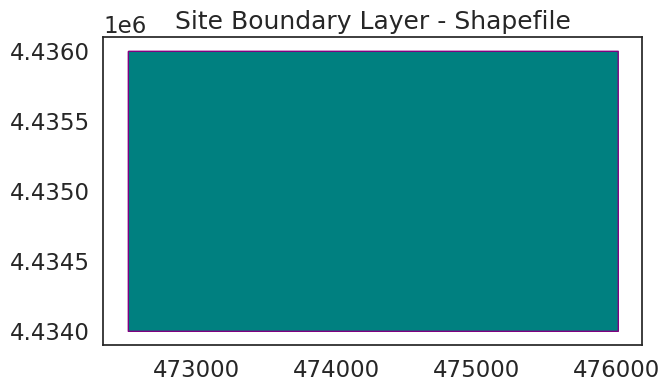

In [27]:
site_bound_path = os.path.join("colorado-flood","spatial", "boulder-leehill-rd", "clip-extent.shp")

site_bound_shp = gpd.read_file(site_bound_path)

fx, ax = plt.subplots(figsize=(8,4))

site_bound_shp.plot(color="teal", edgecolor="purple", ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()


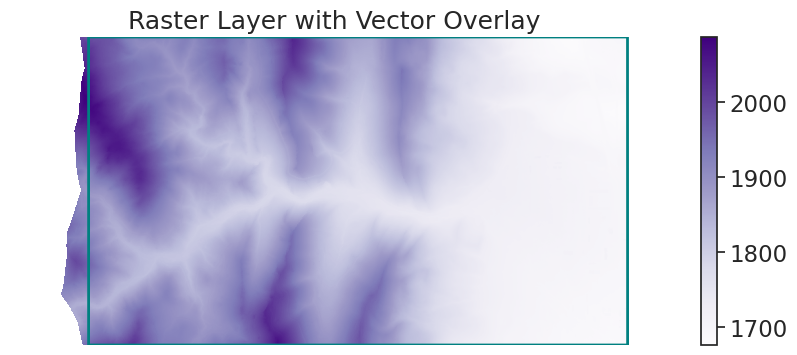

In [29]:
f, ax = plt.subplots(figsize=(11,4))

dtm_pre_arr.plot.imshow(cmap="Purples", ax=ax)

site_bound_shp.plot(color="None", edgecolor="teal", linewidth=2, ax=ax, zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()